### Problem Statement

#### 
The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms

### Steps for Model Building


1. Read and Understand the data
2. Perform EDA using visualization where necessary
3. Build model(s) on imbalanced/balanced dataset
4. Evaluate the model(s)

In [229]:
## Import Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [230]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


In [231]:
## Filter warning
import warnings
warnings.filterwarnings('ignore')

In [232]:
## Set diplay size
pd.set_option('display.max_columns', 500)

### Read Data and perform EDA

In [233]:
# Read Data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [235]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Checking Class Distribution

In [236]:
classes=df['Class'].value_counts()
normal_share= round((classes[0]/df['Class'].count()*100), 2)
print(normal_share)
fraud_share= round((classes[1]/df['Class'].count()*100),2)
print(fraud_share)

99.83
0.17


1. It's clear that the dataset is heavily imbalanced (99.83 vs 0.17)
2. Data needs to be balanced for modelling

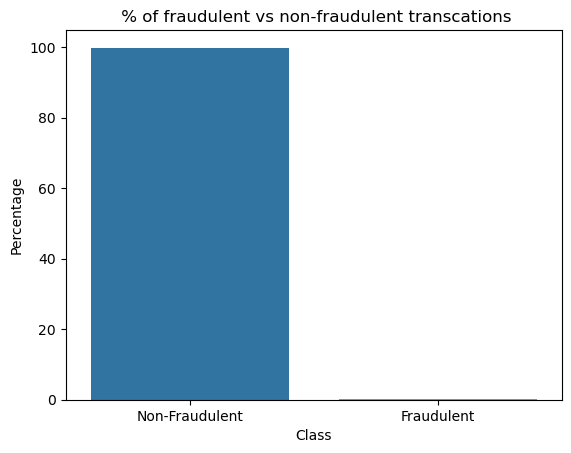

In [237]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title(' % of fraudulent vs non-fraudulent transcations')
plt.show()

Text(0.5, 1.05, 'Transaction Time vs Class')

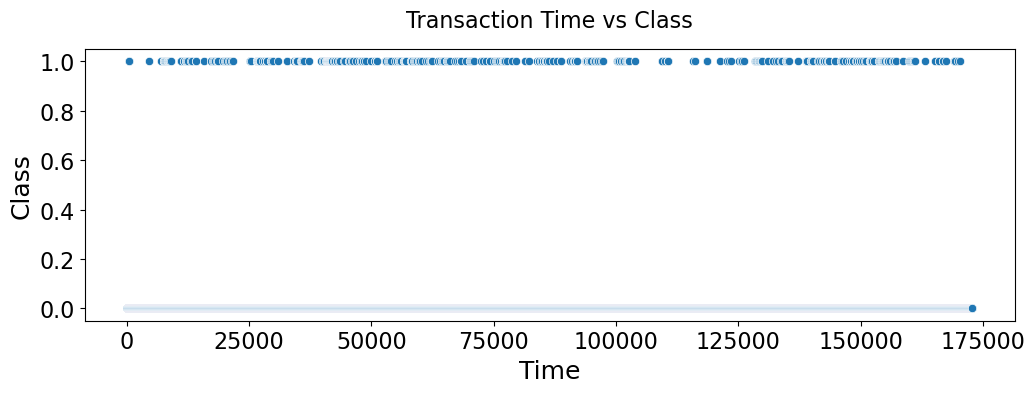

In [238]:
# Create a scatter plot to observe the distribution of classes with time
fig = plt.figure(figsize=(12, 12))
cmap = sns.color_palette('Set2')


plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Transaction Time vs Class', size=16, y=1.05)

In [11]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

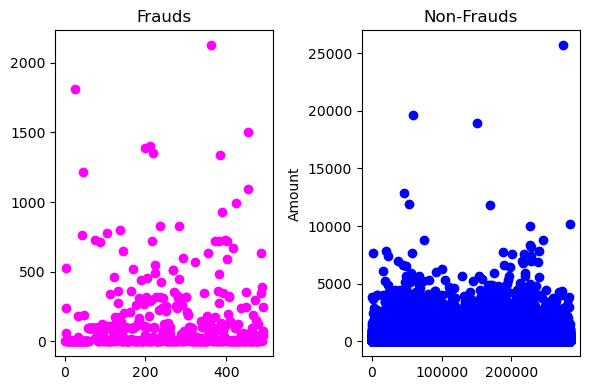

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount

color = {1:'blue', 0:'yellow'}

fig,axes = plt.subplots(1,2, figsize = (6,4))

axes[0].scatter(list(range(1,fraud.shape[0] + 1)), fraud.Amount,color='magenta')
axes[0].set_title('Frauds')
plt.ylabel("Amount")

axes[1].scatter(list(range(1, normal.shape[0] + 1)), normal.Amount,color='blue')
axes[1].set_title('Non-Frauds')
plt.ylabel("Amount")

plt.tight_layout()
plt.show()

In [13]:
# Drop unnecessary columns - Time is not needed
df.drop('Time', axis = 1, inplace= True)

### Split train & test data

In [14]:
#Create X and y dataset
y= df['Class']
X = df.drop(['Class'], axis=1)

In [15]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [16]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Feature Scaling (Amount Column)

In [18]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [19]:
# Instantiate the Scaler
scaler = StandardScaler()

In [20]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [21]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [22]:
# ONLY Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


### Plotting the distribution of a variable

In [23]:
cols = list(X.columns.values)

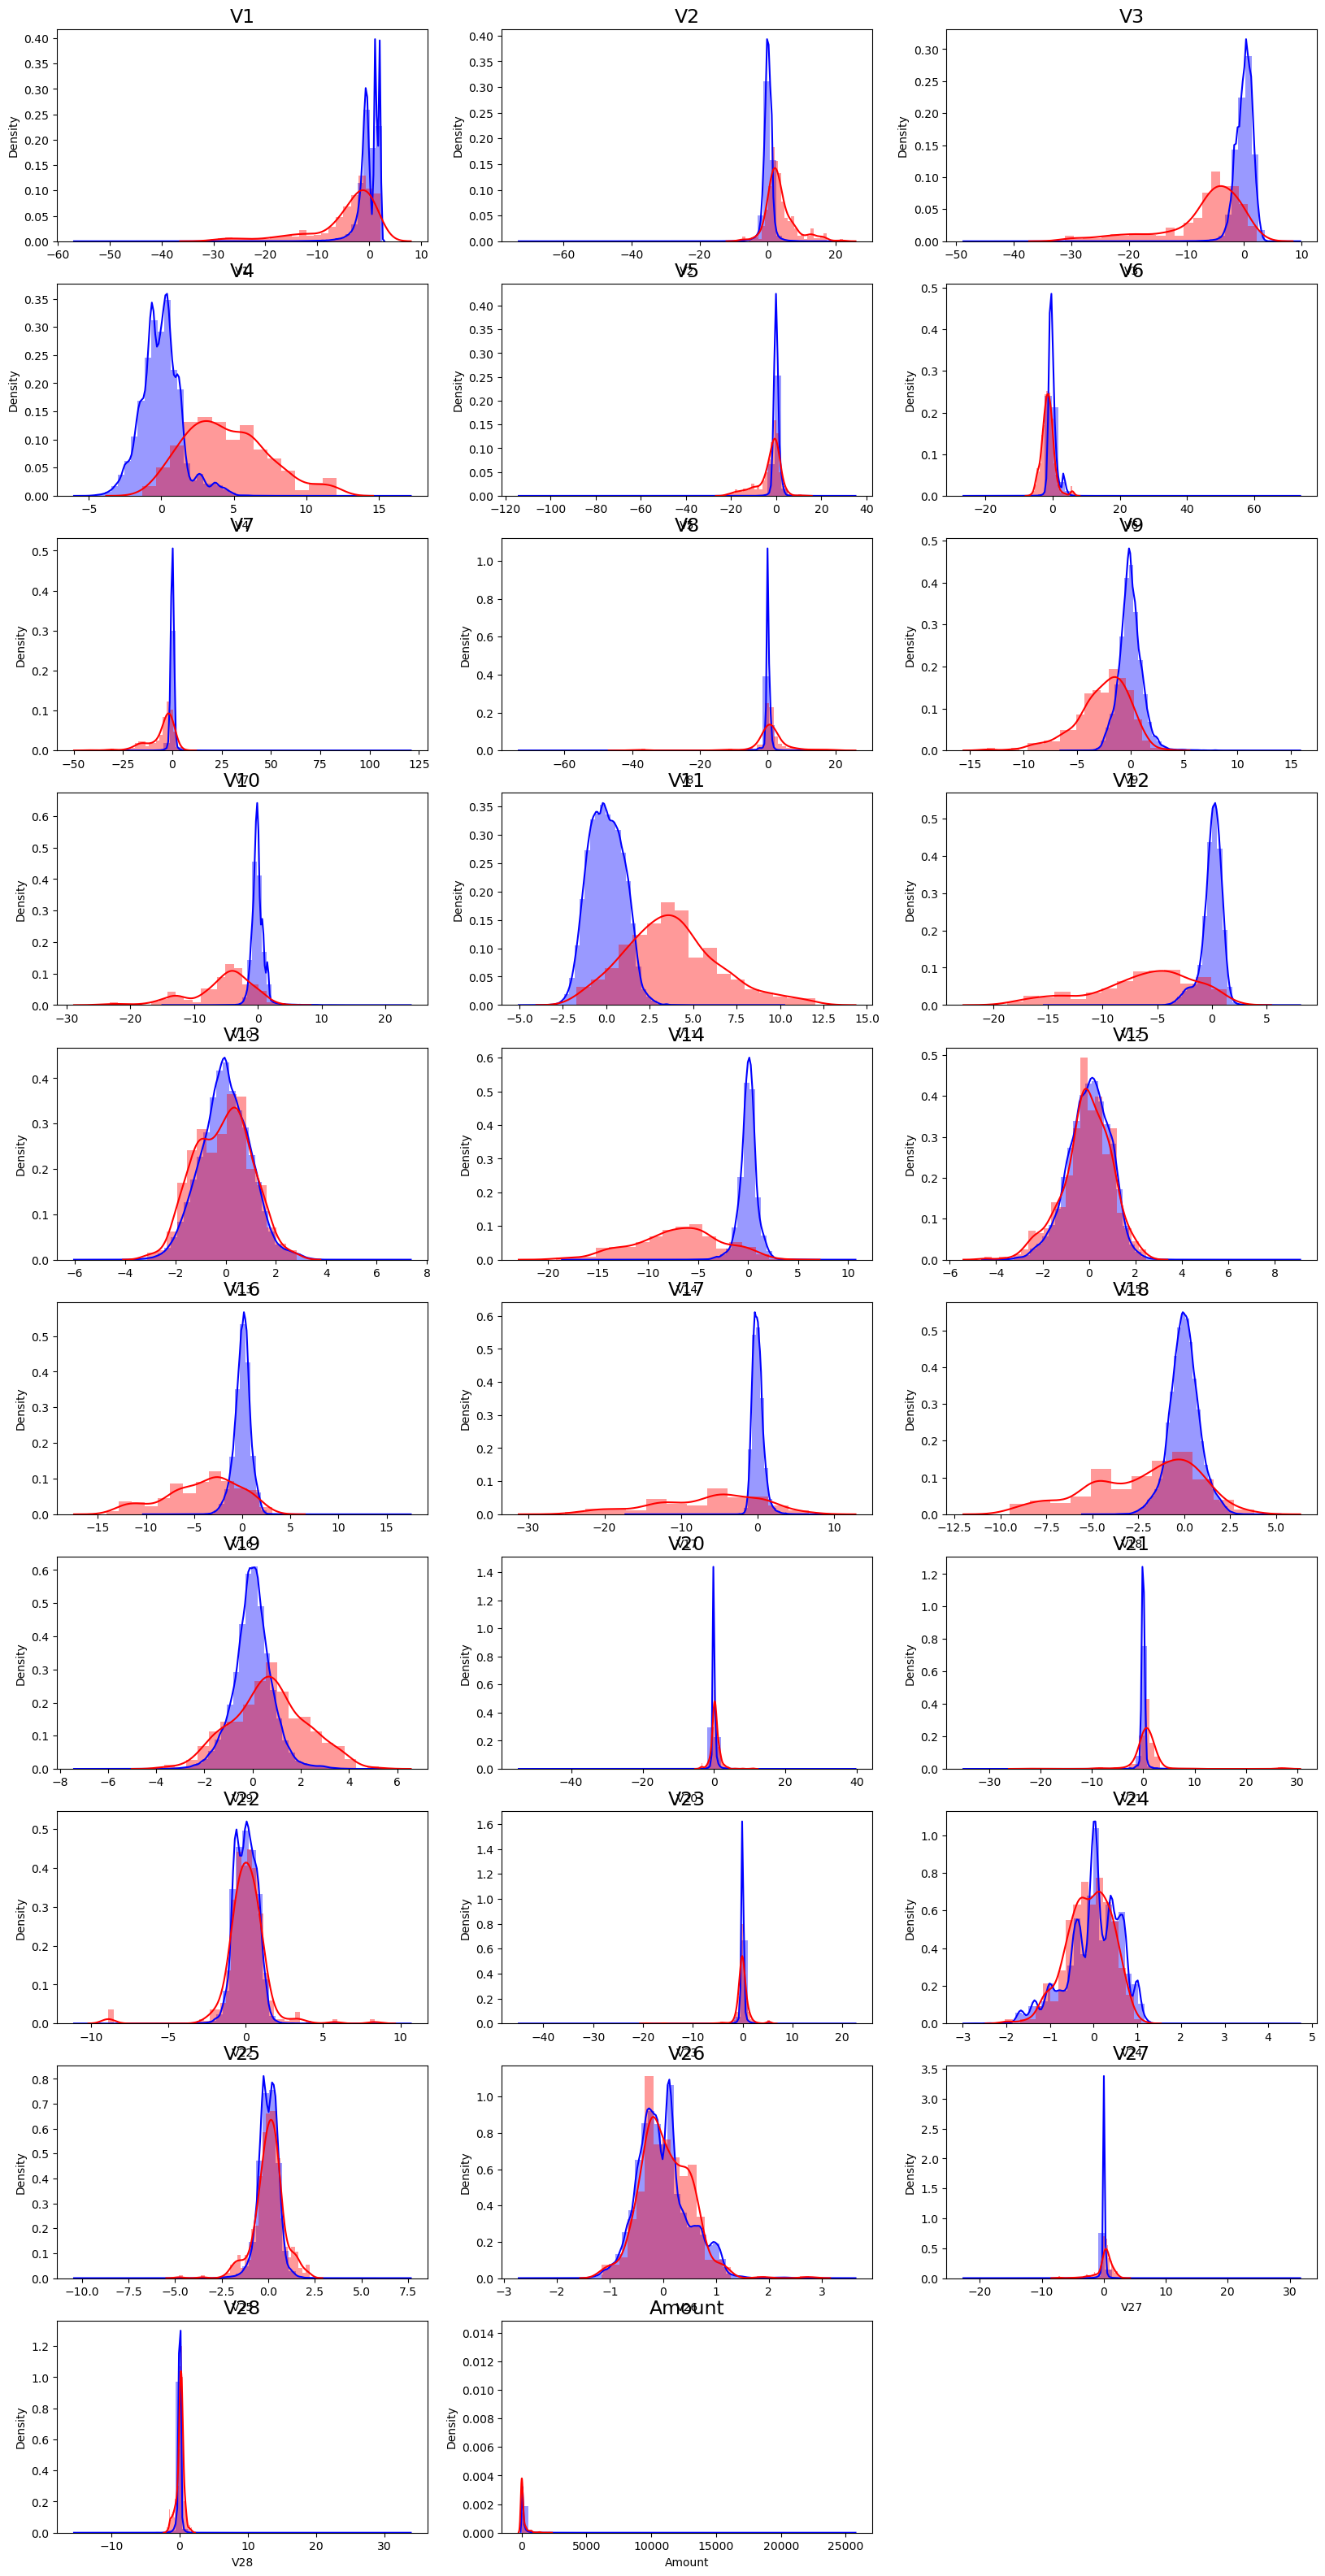

In [24]:
# plot the histogram of a variable from the dataset to see the skewness

normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 40))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='blue')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

#### Use PowerTransformer for Skewness

In [25]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [26]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

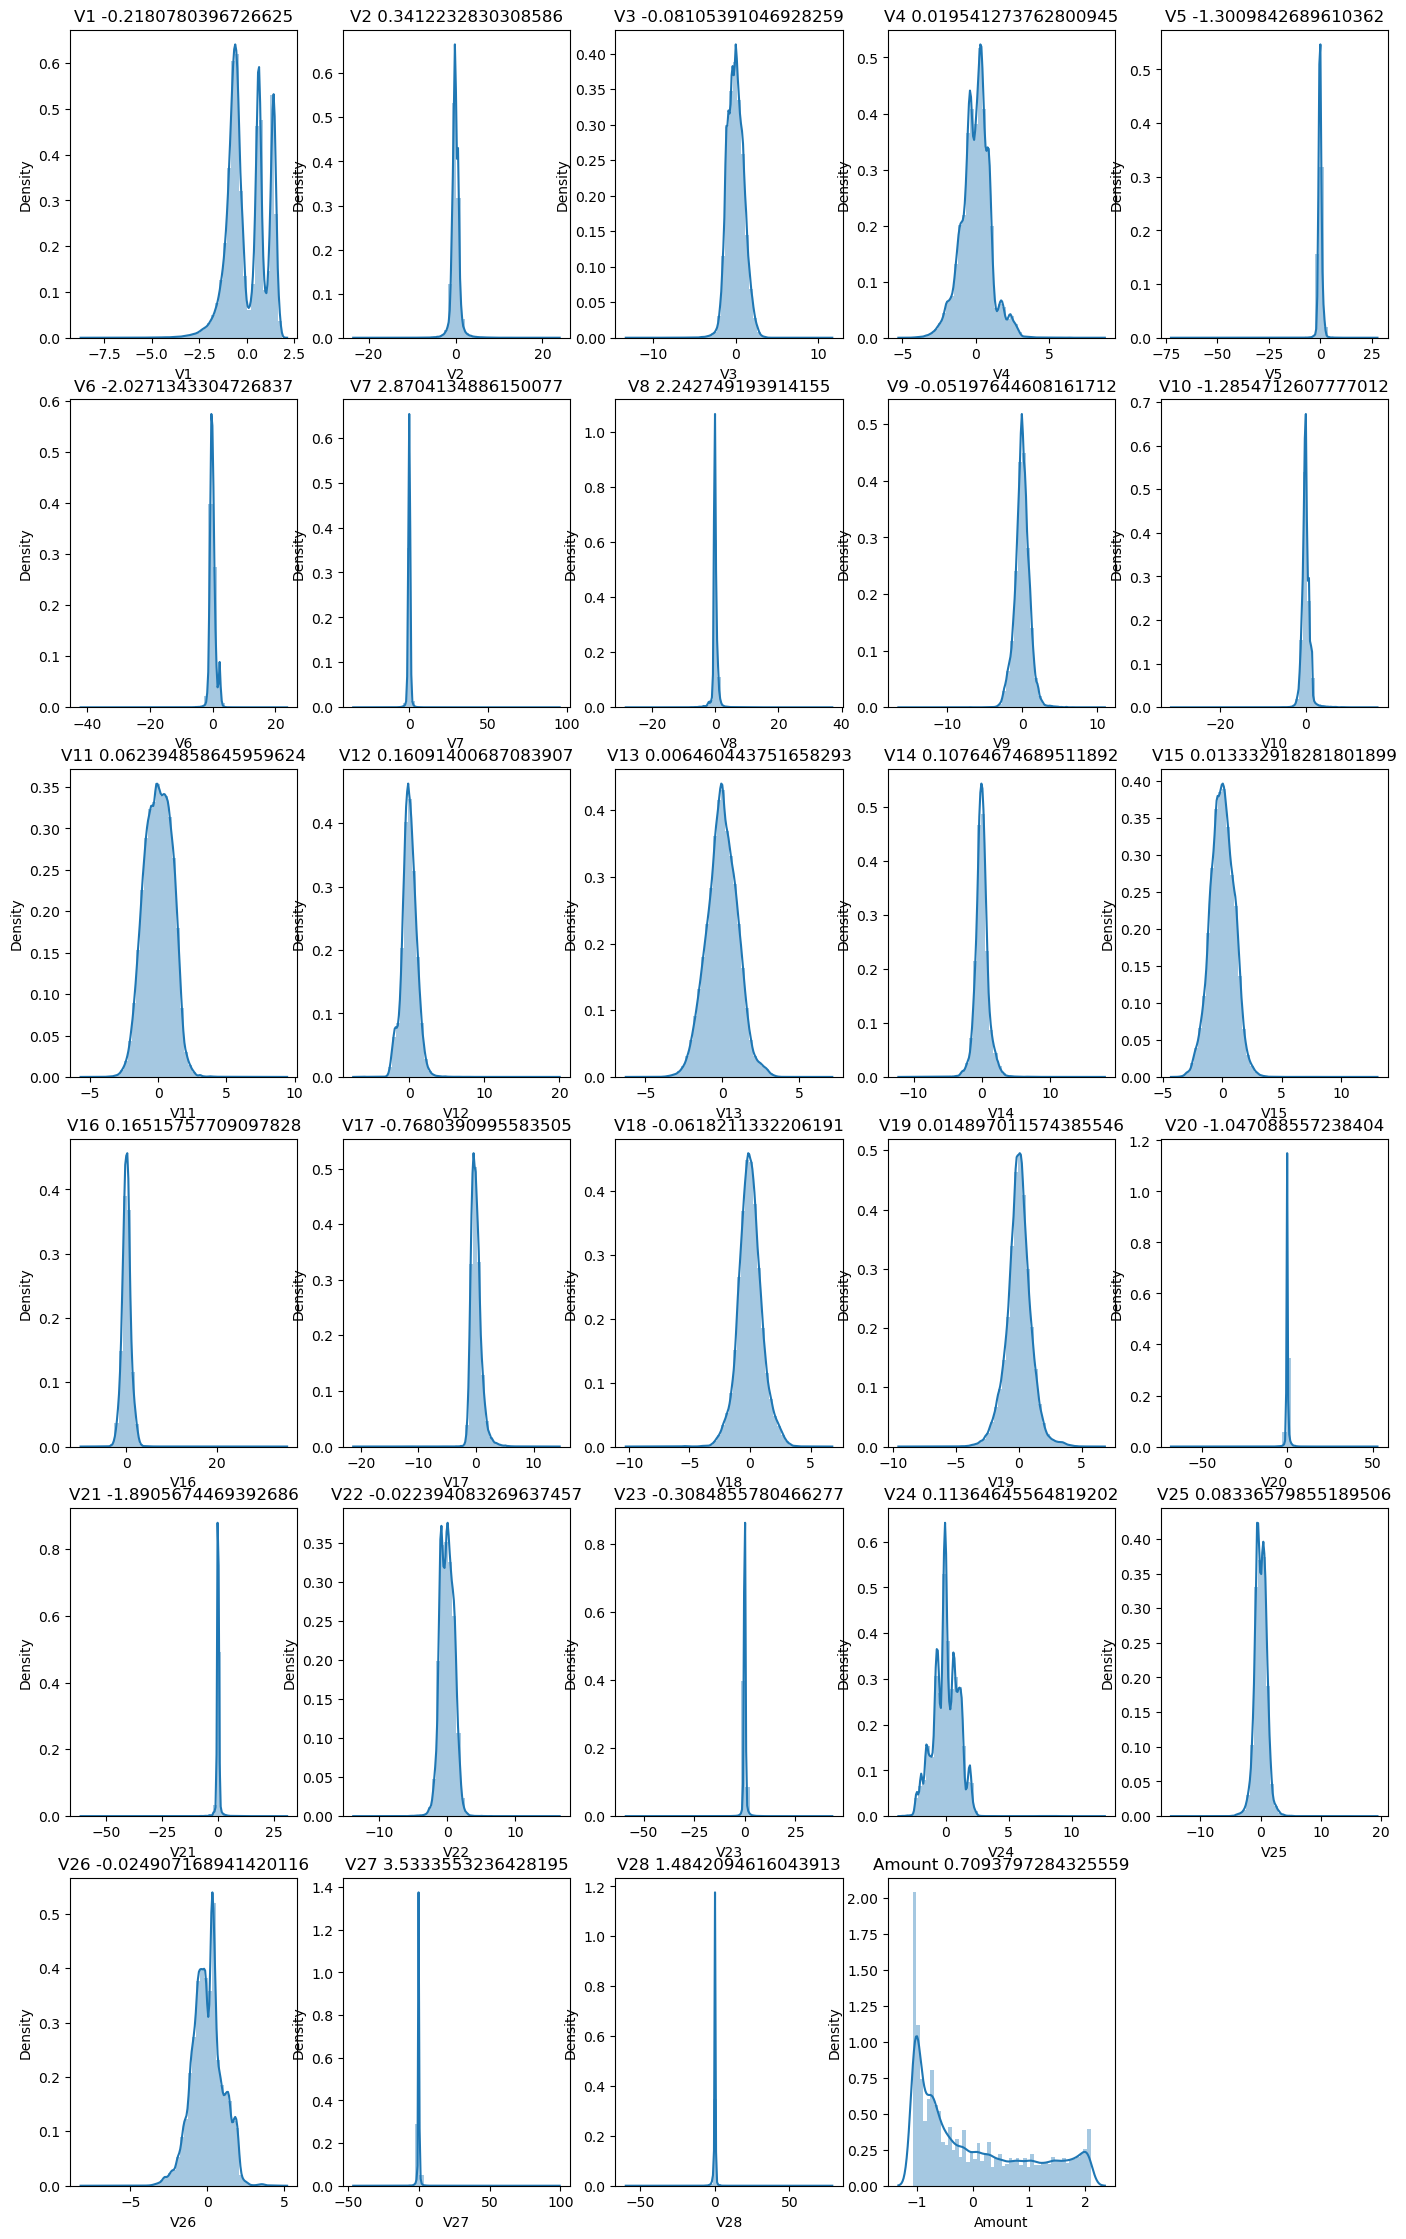

In [27]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

### Model Build on Imbalanced Data

### Decision Tree - Model 1

In [28]:
# Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [29]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [30]:
# Create the grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [31]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.254900,0.025362,0.013279,0.000526,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923868,0.930129,0.004428,5
1,2.250047,0.020163,0.013009,0.000875,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923871,0.930130,0.004426,4
2,2.248643,0.015625,0.012574,0.000902,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933279,0.936720,0.944598,0.938199,0.004738,2
3,2.233542,0.001984,0.012558,0.001090,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933282,0.936720,0.944598,0.938200,0.004737,1
4,4.481424,0.029842,0.015514,0.000148,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924988,0.923864,0.937981,0.928944,0.006406,6
5,4.490072,0.039444,0.015850,0.000177,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924923,0.916465,0.937999,0.926463,0.008858,7
6,4.480106,0.016973,0.015597,0.000043,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933451,0.919684,0.921734,0.924956,0.006065,8
7,4.474089,0.010650,0.015672,0.000540,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933446,0.919649,0.944082,0.932392,0.010002,3


In [32]:
# Printing the optimal hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382001202914115
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100)


In [33]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

In [34]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [35]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [36]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [37]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7490039840637449


In [38]:
# Predict the probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [39]:
# ROC
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9534547393930157

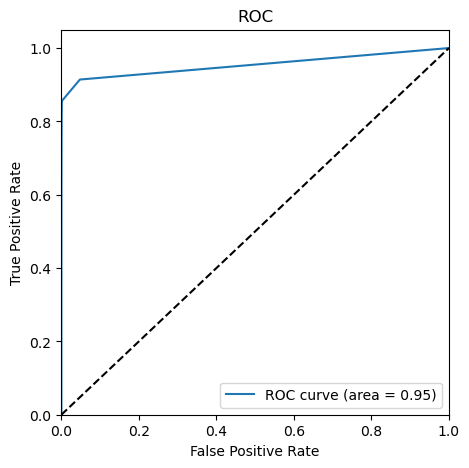

In [40]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Prediction on Test Data

In [41]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [42]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56836    30]
 [   40    56]]


In [43]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [44]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.7490039840637449


In [45]:
# Predict the probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [46]:
# ROC
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.92174979703748

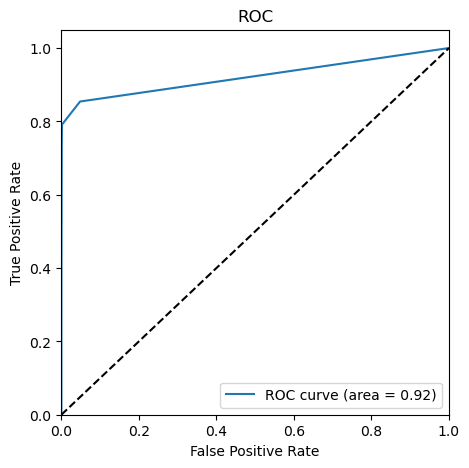

In [47]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary - 

Train set
Accuracy = 0.99;
Sensitivity = 1.0;
Specificity = 1.0;
F1-Score = 0.75;
ROC-AUC = 0.95
------------------------
Test set
Accuracy = 0.99;
Sensitivity = 0.58;
Specificity = 0.99;
F-1 Score = 0.75;
ROC-AUC = 0.92
-------------------------

### XGBoost - Model 2

In [48]:
# Importing XGBoost
from xgboost import XGBClassifier

In [49]:
# creating a KFold  
folds = 3

# range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [50]:
# Grid Search results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.814439,0.021393,0.036118,0.001132,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.971504,0.972498,0.978483,0.974161,0.003082,2,0.999582,0.999761,0.999632,0.999658,0.000075
1,0.810747,0.009949,0.036879,0.001816,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.969237,0.978238,0.973924,0.973800,0.003676,3,0.999976,0.999969,0.999964,0.999970,0.000005
2,0.811425,0.087423,0.036249,0.000593,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977422,0.973420,0.977898,0.976247,0.002008,1,0.999960,0.999977,0.999954,0.999964,0.000010
3,0.820326,0.015862,0.036488,0.000478,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.959016,0.955137,0.967728,0.960627,0.005265,6,0.999993,0.999959,0.999988,0.999980,0.000015
4,0.820288,0.012936,0.036090,0.000910,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.969186,0.962236,0.971101,0.967508,0.003808,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.795841,0.017210,0.036324,0.000865,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.968313,0.968930,0.977132,0.971458,0.004020,4,1.000000,1.000000,1.000000,1.000000,0.000000


In [51]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [52]:
# choose best hyperparameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Predictions on train data

In [53]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [54]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227449      0]
 [     0    396]]


In [55]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [56]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [57]:
# Predict the probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [58]:
# ROC
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

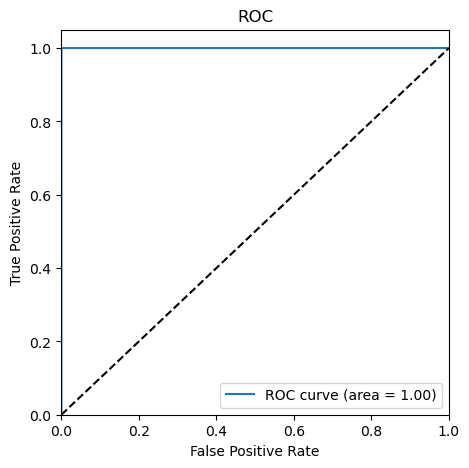

In [59]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Prediction on test data

In [60]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [61]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56858     8]
 [   25    71]]


In [62]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [63]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.999420666409185
Sensitivity:- 0.7395833333333334
Specificity:- 0.9998593183976365
F1-Score:- 0.8114285714285714


In [64]:
# Predict the probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [65]:
# ROC - 
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9723599118981466

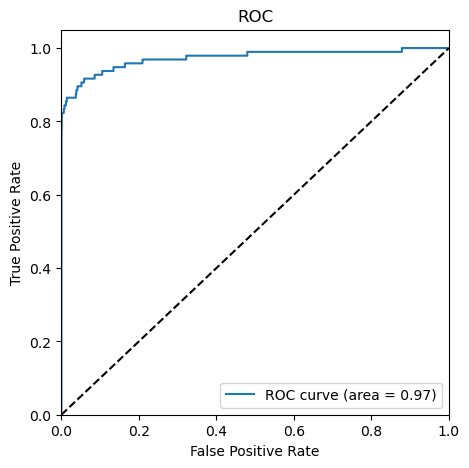

In [66]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

Train set
Accuracy = 0.99;
Sensitivity = 0.85;
Specificity = 0.99;
ROC-AUC = 0.99;
F1-Score = 0.90
--------------------
Test set
Accuracy = 0.99;
Sensitivity = 0.75;
Specificity = 0.99;
ROC-AUC = 0.98;
F-Score = 0.79
---------------------

### KNN - Model 3

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

knn = KNeighborsClassifier()

# create pipeline
steps = [("pt", PowerTransformer(copy = False)),
         ("KNN", knn)
        ]

# compile pipeline
pipe_svc = Pipeline(steps)


# KNN Classifier 
params = {'KNN__n_neighbors': [21,23,25]}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

grid_knn = RandomizedSearchCV(estimator=pipe_svc, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1, random_state = 42)

In [68]:
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('pt',
                                              PowerTransformer(copy=False)),
                                             ('KNN', KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions={'KNN__n_neighbors': [21, 23, 25]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [69]:
grid_knn.best_estimator_

Pipeline(steps=[('pt', PowerTransformer(copy=False)),
                ('KNN', KNeighborsClassifier(n_neighbors=23))])

In [70]:
# print best hyperparameters
print("Best ROC_AUC: ", grid_knn.best_score_)
print("Best hyperparameters: ", grid_knn.best_params_)

Best ROC_AUC:  0.9402867194138915
Best hyperparameters:  {'KNN__n_neighbors': 23}


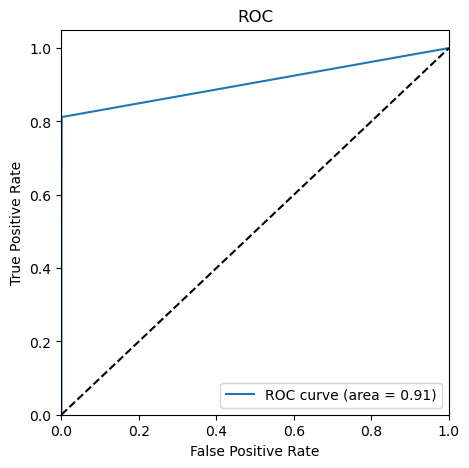

TypeError: cannot unpack non-iterable NoneType object

In [71]:
# predict probabilities
y_pred_prob = grid_knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = draw_roc(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Support Vector Classifier')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

### Best Model

There are 3 models tried out on imbalanced data - 
1. Decision Tree
2. XGBoost
3. KNN

We see that XGBoost gives the best result with ROC value of 1 for Train data and 0.98 for Test data.

### Model Building on balance data

#### Oversampling

In [72]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [73]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

### Decision Tree - Model 1

In [74]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [75]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.625699,0.027698,0.033247,0.002093,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990114,0.990389,0.990829,0.990444,0.000294,5
1,2.638040,0.026885,0.032040,0.000536,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990114,0.990392,0.990814,0.990440,0.000288,6
2,2.596876,0.004670,0.032969,0.000235,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990085,0.990321,0.990724,0.990377,0.000264,8
3,2.629626,0.016858,0.032732,0.000166,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990093,0.990321,0.990734,0.990383,0.000266,7
4,3.989518,0.007071,0.029514,0.001339,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999522,0.999643,0.999657,0.999607,0.000061,1
5,3.972673,0.008811,0.029811,0.001427,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999532,0.999647,0.999633,0.999604,0.000051,2
6,4.005446,0.020467,0.030625,0.000803,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999511,0.999639,0.999530,0.999560,0.000056,4
7,4.005970,0.016162,0.030824,0.000921,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999586,0.999685,0.999513,0.999595,0.000071,3


In [76]:
# Printing the optimal score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9996071963559716
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

#### Train data prediction

In [78]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [79]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[225919   1530]
 [     0 227449]]


In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9966366086463339
Sensitivity:- 1.0
Specificity:- 0.9932732172926678


In [82]:
# Predict the probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [83]:
# ROC
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997624040517621

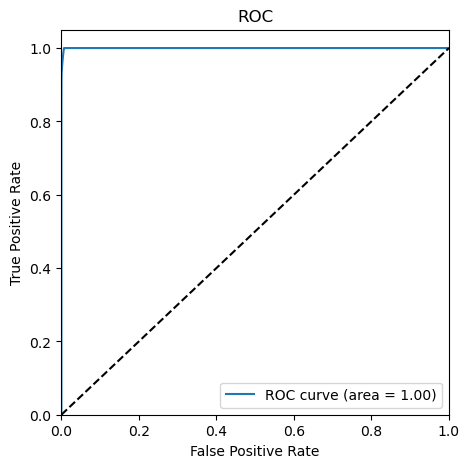

In [84]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Test Data Prediction

In [85]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [86]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56436   430]
 [   20    76]]


In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9920999964888874
Sensitivity:- 0.7916666666666666
Specificity:- 0.9924383638729645


In [89]:
# Predict the probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [90]:
# ROC
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8948785119110423

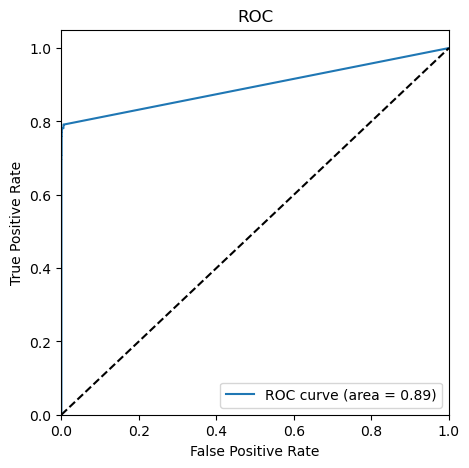

In [91]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

Train set
Accuracy = 0.99;
Sensitivity = 1.0;
Specificity = 0.99;
ROC-AUC = 0.99
-------------------
Test set
Accuracy = 0.99;
Sensitivity = 0.79;
Specificity = 0.99;
ROC-AUC = 0.90
---------------------

### XGBoost - Model 2

In [92]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [93]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.329433,0.017396,0.063970,0.002413,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999897,0.999914,0.999904,0.999905,0.000007,5,0.999911,0.999916,0.999919,0.999915,3.121787e-06
1,1.368437,0.023821,0.063646,0.002211,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999898,0.999914,0.999899,0.999904,0.000007,6,0.999916,0.999917,0.999915,0.999916,8.758415e-07
2,1.307580,0.065436,0.067028,0.007008,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999906,0.999909,0.999907,0.999907,0.000001,4,0.999917,0.999903,0.999917,0.999913,6.512567e-06
3,1.406707,0.039153,0.063061,0.001140,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999988,0.999987,0.999976,0.999984,0.000006,3,0.999996,0.999998,1.000000,0.999998,1.347438e-06
4,1.383582,0.015332,0.065674,0.002055,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999987,0.999986,0.999990,0.999988,0.000002,2,0.999998,0.999998,1.000000,0.999999,9.750434e-07
5,1.316814,0.011739,0.064795,0.002812,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999995,0.999991,0.999982,0.999989,0.000005,1,0.999992,1.000000,1.000000,0.999997,3.531298e-06


In [94]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [95]:
# choose the best hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Test Data prediction

In [96]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [97]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[227449      0]
 [     0 227449]]


In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [100]:
# Predict the probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [101]:
# ROC
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

1.0

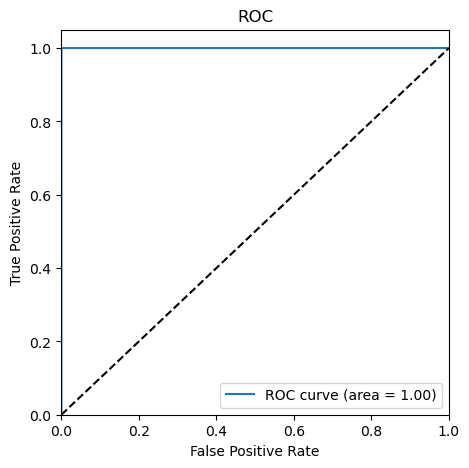

In [102]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Test data prediction

In [103]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

In [104]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56855    11]
 [   22    74]]


In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.999420666409185
Sensitivity:- 0.7708333333333334
Specificity:- 0.9998065627967503


In [107]:
# Predict the probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [108]:
# ROC
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9747599253801333

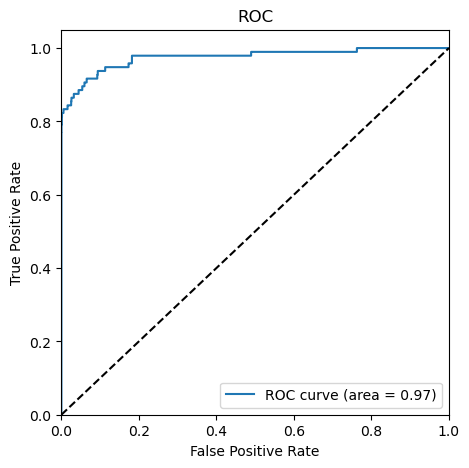

In [109]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

Train set
Accuracy = 1.0;
Sensitivity = 1.0;
Specificity = 1.0;
ROC-AUC = 1.0
------------------
Test set
Accuracy = 0.99;
Sensitivity = 0.80;
Specificity = 0.99;
ROC-AUC = 0.97
--------------------

### SMOTE

In [111]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [113]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

#### Decision Tree - Model 1

In [114]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


In [115]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [116]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.437026,0.042750,0.035111,0.001661,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.985668,0.985240,0.985131,0.985346,0.000232,5
1,4.418704,0.041460,0.032974,0.000053,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.985668,0.985209,0.985132,0.985337,0.000237,6
2,4.400148,0.034074,0.033058,0.000237,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.985629,0.985135,0.985029,0.985264,0.000261,8
3,4.395030,0.014840,0.033778,0.000333,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.985641,0.985166,0.985020,0.985276,0.000265,7
4,8.144046,0.047953,0.034326,0.000401,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998156,0.998002,0.998006,0.998054,0.000072,1
5,8.155245,0.018950,0.034399,0.000557,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998076,0.998034,0.998028,0.998046,0.000021,2
6,8.123130,0.065486,0.034351,0.000433,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998040,0.997935,0.998046,0.998007,0.000051,4
7,8.125437,0.028380,0.034525,0.000451,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998062,0.997941,0.998043,0.998015,0.000053,3


In [117]:
# Printing the optimal hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9980542617000602
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [118]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### Train Data Prediction

In [119]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [120]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[224150   3299]
 [  2727 224722]]


In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9867530743155608
Sensitivity:- 0.9880104990569314
Specificity:- 0.9854956495741902


In [123]:
# Predict the probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [124]:
# ROC
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9984797135651742

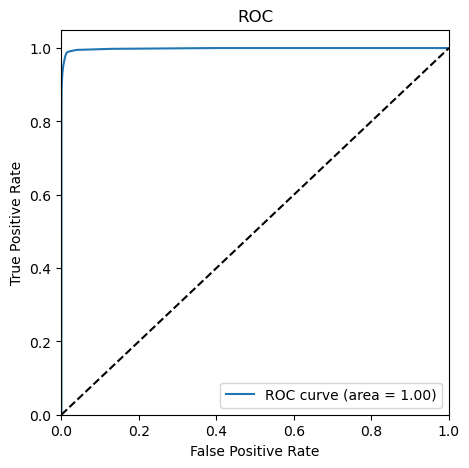

In [125]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Test data prediction

In [126]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [127]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55899   967]
 [   21    75]]


In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [129]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9826551034022681
Sensitivity:- 0.78125
Specificity:- 0.9829951113143178


In [130]:
# Predict the probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [131]:
# ROC
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8851427222183145

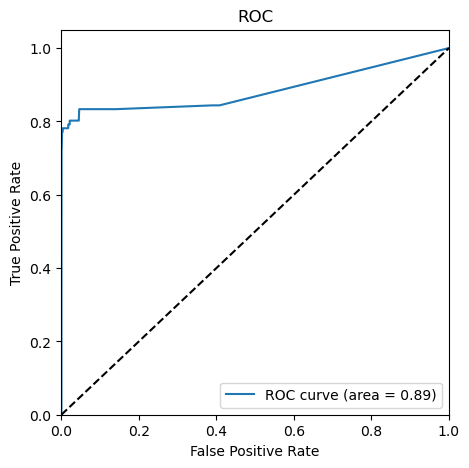

In [132]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

Train set Accuracy = 0.99; Sensitivity = 0.99; Specificity = 0.99; ROC-AUC = 0.99

Test set Accuracy = 0.98; Sensitivity = 0.78; Specificity = 0.98; ROC-AUC = 0.88


#### XGBoost - Model 2

In [133]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [134]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.365189,0.018017,0.066967,0.003239,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999693,0.999741,0.999669,0.999701,0.000030,5,0.999744,0.999734,0.999721,0.999733,0.000009
1,1.371847,0.011717,0.067453,0.003538,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999674,0.999725,0.999685,0.999695,0.000022,6,0.999737,0.999697,0.999729,0.999721,0.000017
2,1.316422,0.015106,0.065119,0.002796,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999665,0.999740,0.999715,0.999707,0.000031,4,0.999715,0.999723,0.999751,0.999730,0.000015
3,1.394679,0.047750,0.064528,0.001803,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999942,0.999951,0.999959,0.999950,0.000007,3,0.999971,0.999970,0.999980,0.999974,0.000005
4,1.444732,0.054753,0.063273,0.001497,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999957,0.999962,0.999955,0.999958,0.000003,1,0.999982,0.999977,0.999985,0.999981,0.000003
5,1.326411,0.044742,0.069642,0.005061,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999959,0.999953,0.999953,0.999955,0.000003,2,0.999983,0.999976,0.999980,0.999980,0.000003


In [135]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [136]:
# choose the best hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Train data prediction

In [137]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [138]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[227447      2]
 [     0 227449]]


In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999956034099952
Sensitivity:- 1.0
Specificity:- 0.9999912068199904


In [141]:
# Predict the probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [142]:
# ROC
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

1.0

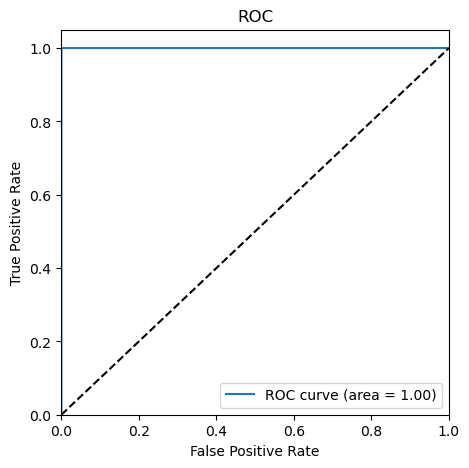

In [143]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Test data prediction

In [144]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [145]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56828    38]
 [   20    76]]


In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.7916666666666666
Specificity:- 0.9993317623887736


In [148]:
# Predict the probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [149]:
# ROC
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9599165508974314

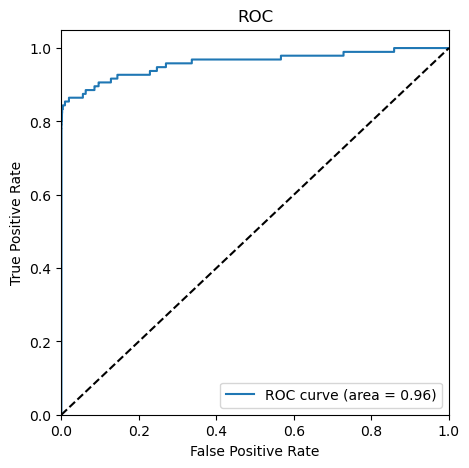

In [150]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

Train set
Accuracy = 0.99;
Sensitivity = 1.0;
Specificity = 0.99;
ROC-AUC = 1.0
------------------
Test set
Accuracy = 0.99;
Sensitivity = 0.79;
Specificity = 0.99;
ROC-AUC = 0.96
--------------------

### Adasyn

In [151]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [152]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

### Decision Tree - Model 1

In [154]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [155]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.442534,0.009085,0.032547,0.001654,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.897478,0.909411,0.919835,0.908908,0.009134,8
1,4.429234,0.062773,0.031805,0.001176,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.897480,0.909411,0.919835,0.908909,0.009134,7
2,4.418903,0.025689,0.031522,0.000697,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.897456,0.909347,0.920527,0.909110,0.009420,6
3,4.440338,0.078372,0.033537,0.002155,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.897463,0.909346,0.921371,0.909394,0.009760,5
4,7.652244,0.259693,0.032420,0.001304,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.915576,0.940973,0.952035,0.936195,0.015263,1
5,7.725010,0.232035,0.031876,0.001611,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.915276,0.941032,0.951202,0.935837,0.015120,2
6,7.726247,0.272021,0.031525,0.000915,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.907266,0.940146,0.950782,0.932731,0.018523,4
7,7.715407,0.245114,0.031775,0.000852,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.907281,0.940150,0.952755,0.933396,0.019169,3


In [156]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9361949088408078
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [157]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

#### Train data prediction

In [158]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [159]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[215727  11722]
 [  1583 225823]]


In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9707489199854898
Sensitivity:- 0.9930388819995954
Specificity:- 0.9484631719638249


In [162]:
# Predict the probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [163]:
# ROC
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9913321280739741

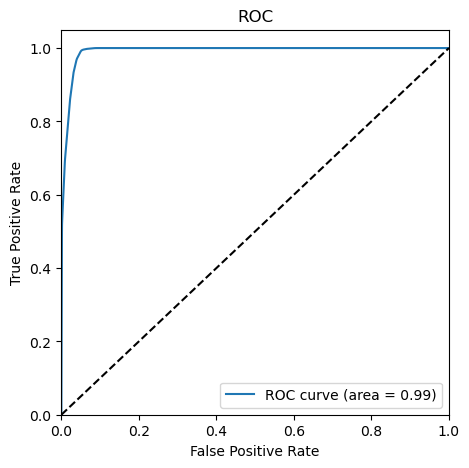

In [164]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Test Data prediction

In [165]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [166]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[53753  3113]
 [   14    82]]


In [167]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [168]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.945103753379446
Sensitivity:- 0.8541666666666666
Specificity:- 0.9452572714803221


In [169]:
# Predict the probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [170]:
# ROC
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9245179090610676

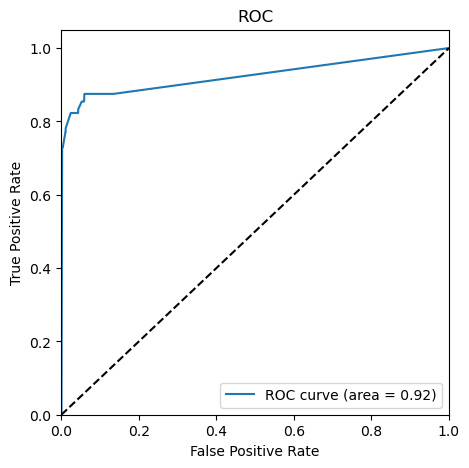

In [171]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

Train set
Accuracy = 0.97;
Sensitivity = 0.99;
Specificity = 0.95;
ROC-AUC = 0.99
-------------------
Test set
Accuracy = 0.95;
Sensitivity = 0.84;
Specificity = 0.95;
ROC-AUC = 0.91
---------------------

### XGBoost - Model 2

In [172]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [173]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.294761,0.025491,0.066833,0.002093,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.964051,0.996321,0.994058,0.984810,0.014708,6,0.999341,0.999115,0.999180,0.999212,0.000095
1,1.286566,0.014213,0.066938,0.006491,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.966070,0.995887,0.995510,0.985822,0.013968,4,0.999302,0.999109,0.999236,0.999216,0.000080
2,1.261131,0.022743,0.069563,0.008642,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.966038,0.996221,0.994732,0.985664,0.013891,5,0.999264,0.999127,0.999122,0.999171,0.000066
3,1.232235,0.025499,0.061885,0.001306,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.967989,0.997270,0.998854,0.988038,0.014191,1,0.999940,0.999941,0.999955,0.999945,0.000007
4,1.334161,0.049952,0.064907,0.002630,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.966342,0.995658,0.996601,0.986201,0.014047,3,0.999940,0.999938,0.999942,0.999940,0.000002
5,1.302367,0.037189,0.064438,0.000613,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.965248,0.997215,0.997737,0.986733,0.015194,2,0.999959,0.999946,0.999953,0.999952,0.000005


In [174]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [175]:
# choose the best hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

#### Train data prediction

In [176]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [177]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227449      0]
 [     0 227406]]


In [178]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [179]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999912059887217
Sensitivity:- 1.0
Specificity:- 1.0


In [180]:
# Predict the probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [181]:
# ROC
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

1.0

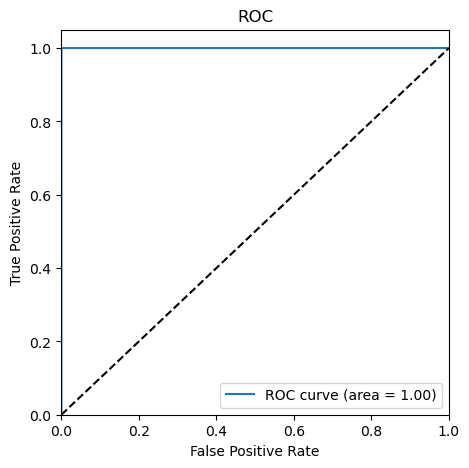

In [182]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Test data prediction

In [183]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [184]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56828    38]
 [   19    77]]


In [185]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [186]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9989993328885924
Sensitivity:- 0.8020833333333334
Specificity:- 0.9993317623887736


In [187]:
# Predict the probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [188]:
# ROC
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9492558895766656

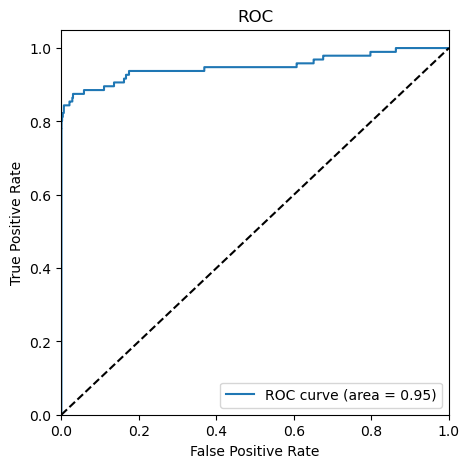

In [189]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

Train set
Accuracy = 0.99;
Sensitivity = 1.0;
Specificity = 1.0;
ROC-AUC = 1.0
--------------------
Test set
Accuracy = 0.99;
Sensitivity = 0.78;
Specificity = 0.99;
ROC-AUC = 0.96
---------------------

## Undersampling

In [190]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [191]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [192]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


### Decision Tree - Model 1

In [193]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [194]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007475,0.001896,0.002122,0.000693,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.952852,0.952652,0.972882,0.959462,0.009490,2
1,0.004526,0.000167,0.001259,0.000074,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.952967,0.953340,0.973801,0.960036,0.009734,1
2,0.002821,0.000125,0.000978,0.000025,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.945678,0.928977,0.955865,0.943507,0.011084,7
3,0.002554,0.000083,0.000936,0.000060,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.945506,0.936209,0.955406,0.945707,0.007839,6
4,0.003141,0.000080,0.000906,0.000021,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.952852,0.948261,0.963413,0.954842,0.006344,4
5,0.003127,0.000185,0.000839,0.000014,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.952738,0.949725,0.963183,0.955215,0.005767,3
6,0.002252,0.000023,0.000791,0.000039,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.946023,0.935606,0.956784,0.946138,0.008646,5
7,0.002232,0.000057,0.000915,0.000204,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.942149,0.926997,0.956554,0.941900,0.012068,8


In [195]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9600359657177838
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


In [196]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Train data prediction

In [197]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [198]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[386  10]
 [ 49 347]]


In [199]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [200]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9255050505050505
Sensitivity:- 0.8762626262626263
Specificity:- 0.9747474747474747


In [201]:
# Predict the probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [202]:
# ROC
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9800020406081011

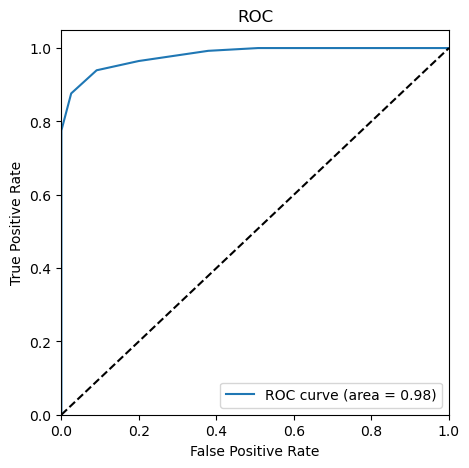

In [203]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Test data prediction

In [204]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

In [205]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55311  1555]
 [   17    79]]


In [206]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [207]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9724026544011798
Sensitivity:- 0.8229166666666666
Specificity:- 0.9726550135406042


In [208]:
# ROC
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9492558895766656

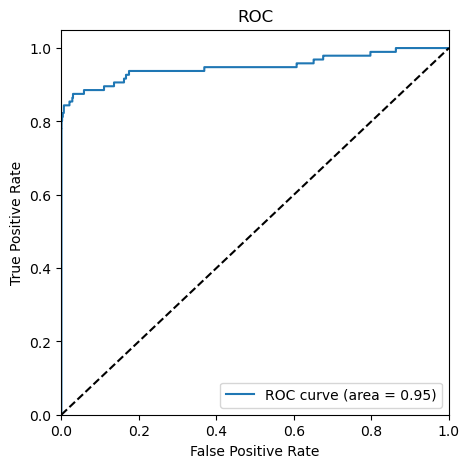

In [209]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

Train set
Accuracy = 0.93;
Sensitivity = 0.88;
Specificity = 0.97;
ROC-AUC = 0.98
-------------------
Test set
Accuracy = 0.97;
Sensitivity = 0.82;
Specificity = 0.97;
ROC-AUC = 0.95
--------------------

### XGBoost - Model 2

In [210]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rus, y_train_rus)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [211]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.079044,0.007272,0.004198,0.000198,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.969927,0.966942,0.975723,0.970864,0.003646,1,0.999842,0.999943,0.999957,0.999914,0.000051
1,0.063638,0.001850,0.004340,0.000592,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.963441,0.966655,0.972050,0.967382,0.003552,5,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.056121,0.007598,0.003979,0.000118,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.970271,0.970099,0.967401,0.969257,0.001314,2,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.039745,0.000366,0.003602,0.000024,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.962121,0.972796,0.969008,0.967975,0.004419,4,0.998924,0.999971,1.000000,0.999632,0.000501
4,0.053952,0.011464,0.003738,0.000208,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.969640,0.960399,0.975608,0.968549,0.006257,3,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.069535,0.008426,0.004061,0.000256,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.965852,0.968205,0.967860,0.967306,0.001038,6,1.000000,1.000000,1.000000,1.000000,0.000000


In [212]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [213]:
# choose the best hyperparameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

#### Train data prediction

In [214]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [215]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[396   0]
 [  0 396]]


In [216]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [217]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [218]:
# Predict the probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [219]:
# ROC
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

1.0

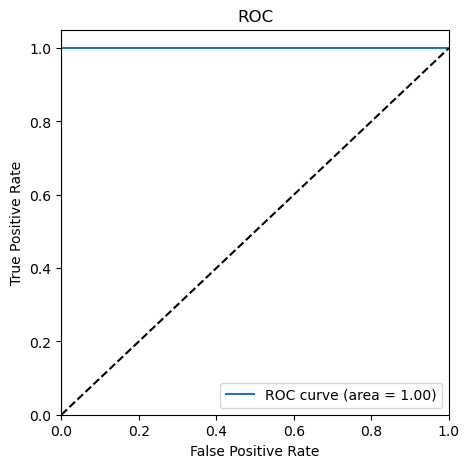

In [220]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Test data prediction

In [221]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [222]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55399  1467]
 [    8    88]]


In [223]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [224]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9741055440469084
Sensitivity:- 0.9166666666666666
Specificity:- 0.9742025111666022


In [225]:
# Predict the probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [226]:
# ROC
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9798347210987233

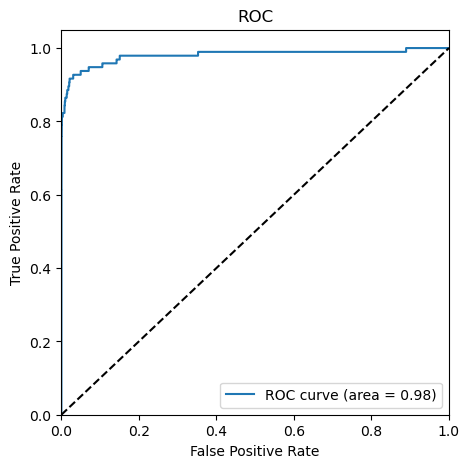

In [227]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

Train set
Accuracy = 1.0;
Sensitivity = 1.0;
Specificity = 1.0;
ROC-AUC = 1.0
-------------------
Test set
Accuracy = 0.97;
Sensitivity = 0.92;
Specificity = 0.97;
ROC-AUC = 0.98
---------------------

## Overall Summary 

Imbalanced Data

### Decision Tree - 

Model Summary -
Train set Accuracy = 0.99; Sensitivity = 1.0; Specificity = 1.0; F1-Score = 0.75; ROC-AUC = 0.95
Test set Accuracy = 0.99; Sensitivity = 0.58; Specificity = 0.99; F-1 Score = 0.75; ROC-AUC = 0.92

### XGBoost -

Model summary
Train set Accuracy = 0.99; Sensitivity = 0.85; Specificity = 0.99; ROC-AUC = 0.99; F1-Score = 0.90
Test set Accuracy = 0.99; Sensitivity = 0.75; Specificity = 0.99; ROC-AUC = 0.98; F-Score = 0.79

KNN - 
ROC - 94

========================================================================================================

Balanced Data
#### Oversampling

### Decision Tree - 

Model summary
Train set Accuracy = 0.99; Sensitivity = 1.0; Specificity = 0.99; ROC-AUC = 0.99
Test set Accuracy = 0.99; Sensitivity = 0.79; Specificity = 0.99; ROC-AUC = 0.90

### XGBoost - 
Model summary
Train set Accuracy = 1.0; Sensitivity = 1.0; Specificity = 1.0; ROC-AUC = 1.0
Test set Accuracy = 0.99; Sensitivity = 0.80; Specificity = 0.99; ROC-AUC = 0.97

#### SMOTE

### Decision Tree - 
Model summary
Train set Accuracy = 0.99; Sensitivity = 0.99; Specificity = 0.99; ROC-AUC = 0.99
Test set Accuracy = 0.98; Sensitivity = 0.78; Specificity = 0.98; ROC-AUC = 0.88

### XGBoost - 
Model summary
Train set Accuracy = 0.99; Sensitivity = 1.0; Specificity = 0.99; ROC-AUC = 1.0
Test set Accuracy = 0.99; Sensitivity = 0.79; Specificity = 0.99; ROC-AUC = 0.96

#### Adasyn

### Decision Tree - 
Model summary
Train set Accuracy = 0.97; Sensitivity = 0.99; Specificity = 0.95; ROC-AUC = 0.99
Test set Accuracy = 0.95; Sensitivity = 0.84; Specificity = 0.95; ROC-AUC = 0.91

### XGBoost - 
Model summary
Train set Accuracy = 0.99; Sensitivity = 1.0; Specificity = 1.0; ROC-AUC = 1.0
Test set Accuracy = 0.99; Sensitivity = 0.78; Specificity = 0.99; ROC-AUC = 0.96

-----------------------------------------------------------------------------------------------------------------

#### Undersampling

### Decision Tree - 
Model summary
Train set Accuracy = 0.93; Sensitivity = 0.88; Specificity = 0.97; ROC-AUC = 0.98
Test set Accuracy = 0.97; Sensitivity = 0.82; Specificity = 0.97; ROC-AUC = 0.95

### XGBoost - 
Model summary
Train set Accuracy = 1.0; Sensitivity = 1.0; Specificity = 1.0; ROC-AUC = 1.0
Test set Accuracy = 0.97; Sensitivity = 0.92; Specificity = 0.97; ROC-AUC = 0.98


#### From all the various techniques applied on different models, the best performance is seen in XGBoost using SMOTE and ADASYN Oversampling